In [2]:
import numpy as np
import skimage.io
import scipy.ndimage
import skimage.transform
import matplotlib.pyplot as plt 
from structure_tensor import eig_special_2d, structure_tensor_2d
from st2d_helpers import plot_orientations

from torch import nn, Tensor, flatten, cdist, linalg

#### Load data

(256, 256)

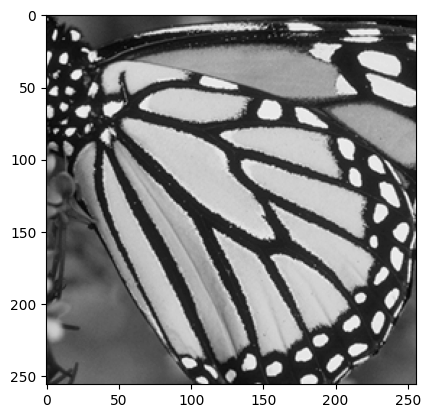

In [3]:
im = skimage.io.imread("data/butterfly.png", as_gray=True)
plt.imshow(im, "gray")
im.shape

In [43]:
sigma = 0.4
rho = 2.5

S = structure_tensor_2d(im.astype('float64'), sigma, rho)
val, vec = eig_special_2d(S)
print(f"S: {S.shape}, val: {val.shape}, vec: {vec.shape}")

S: (3, 256, 256), val: (2, 256, 256), vec: (2, 256, 256)


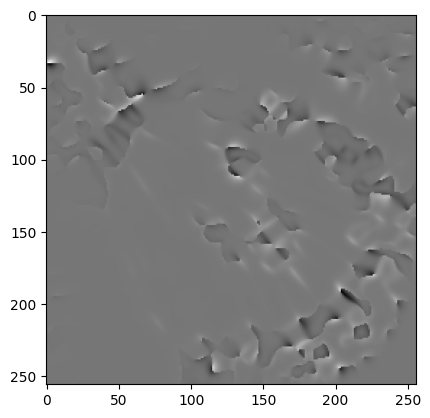

In [44]:
plt.imshow((vec * val)[0,:,:], "gray")
plt.show()

In [56]:
orientation = (np.arctan2(vec[1], vec[0])/np.pi).reshape(im.shape)

In [57]:
orientation.shape

(256, 256)

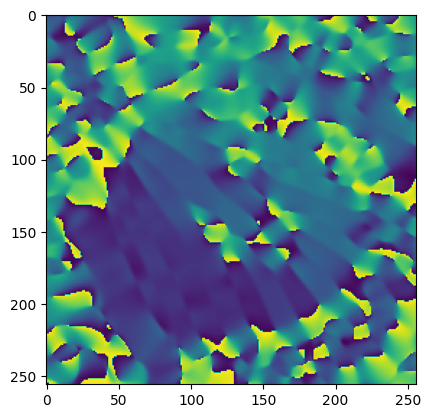

In [51]:
plt.imshow(orientation)

In [47]:
(vec * val).shape

(2, 256, 256)

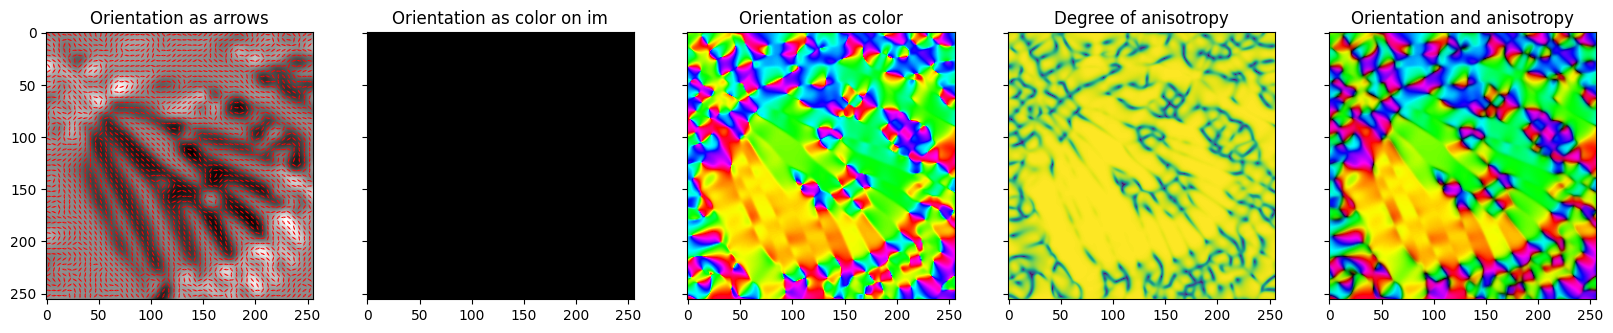

In [30]:

# visualization
figsize = (20,5)
fig, ax = plt.subplots(1, 5, figsize=figsize, sharex=True, sharey=True)
ax[0].imshow(im, cmap=plt.cm.gray)
plot_orientations(ax[0], im.shape, vec)
ax[0].set_title('Orientation as arrows')
orientation_st_rgba = plt.cm.hsv((np.arctan2(vec[1], vec[0])/np.pi).reshape(im.shape))
ax[1].imshow(plt.cm.gray(im)*orientation_st_rgba)
ax[1].set_title('Orientation as color on im')
ax[2].imshow(orientation_st_rgba)
ax[2].set_title('Orientation as color')
anisotropy = (1-val[0]/val[1]).reshape(im.shape)
ax[3].imshow(anisotropy)
ax[3].set_title('Degree of anisotropy')
ax[4].imshow(plt.cm.gray(anisotropy)*orientation_st_rgba)
ax[4].set_title('Orientation and anisotropy')
plt.show()    

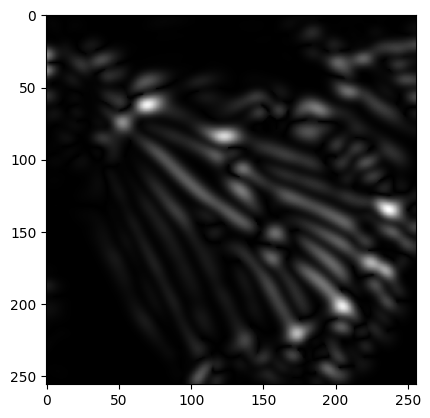

#### Visualize S

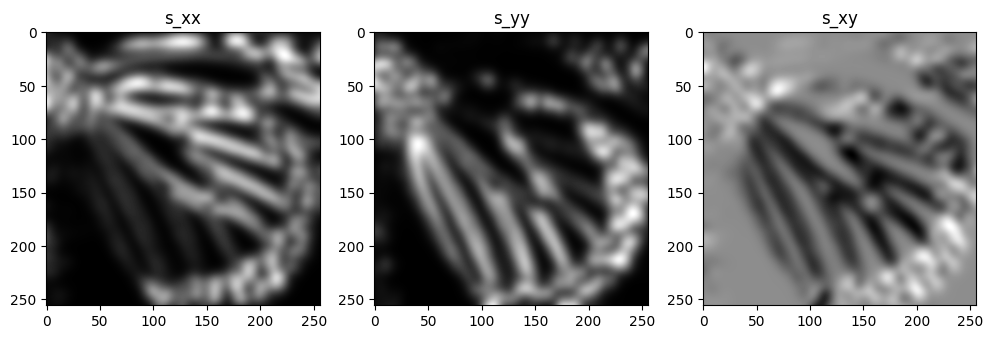

In [7]:
fig, axs = plt.subplots(1,3,figsize=(12,12))
for i,name in enumerate(["s_xx","s_yy","s_xy"]):
    im = S[i,:,:]
    axs[i].imshow(im, cmap="gray")
    axs[i].set_title(name)
plt.show()

In [59]:
import torch

In [143]:
a = torch.tensor(S)
a.shape

torch.Size([3, 256, 256])

In [144]:
b = torch.cat((a, a[2,:,:].unsqueeze(0)))
b = b[[0,2,3,1],:,:]
b.shape

torch.Size([4, 256, 256])

In [149]:
c = b.flatten(1,2)
c.shape

torch.Size([4, 65536])

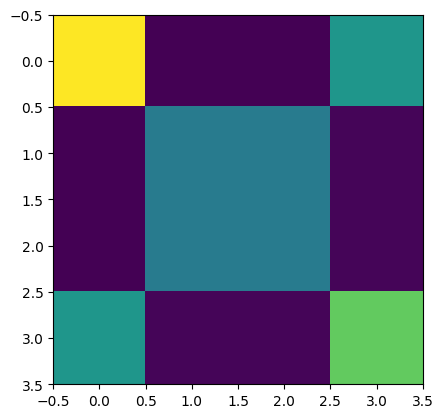

In [150]:
plt.imshow(c @ c.T)

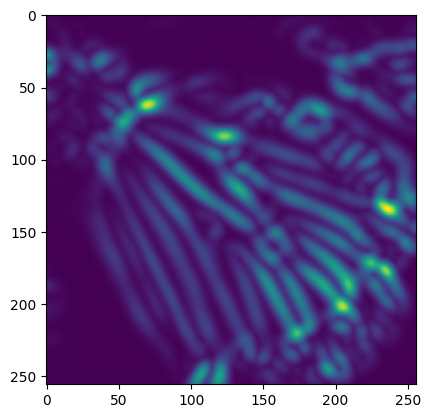

In [151]:
plt.imshow(val[1,:,:])

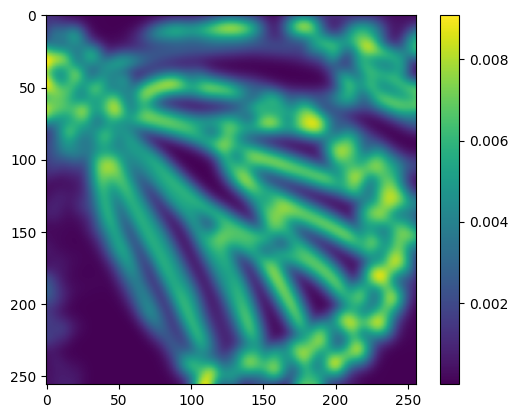

In [9]:
plt.imshow(np.linalg.norm(val,axis=0))
plt.colorbar()
plt.show()

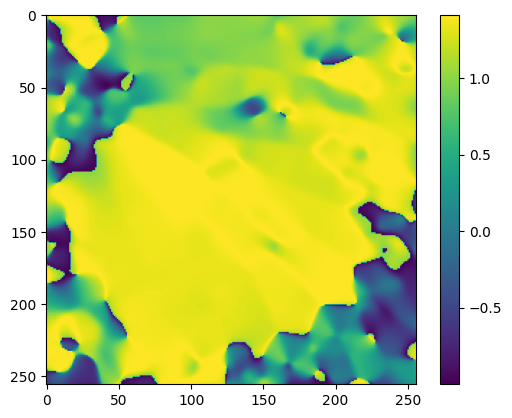

In [10]:
plt.imshow(np.sum(vec,axis=0))
plt.colorbar()
plt.show()

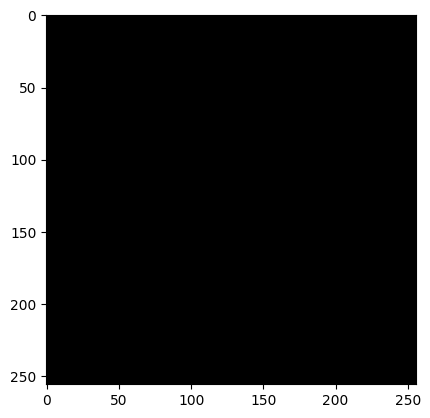

In [11]:
orientation_st_rgba = plt.cm.hsv((np.arctan2(vec[1], vec[0])/np.pi).reshape(im.shape))
# plt.imshow(orientation_st_rgba)
plt.imshow(plt.cm.gray(im)*orientation_st_rgba)
plt.show()

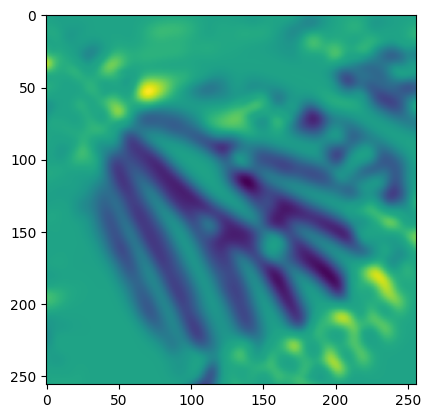

In [12]:
anisotropy = (1-val[0]/val[1]).reshape(im.shape)
plt.imshow(im * anisotropy)
plt.show()

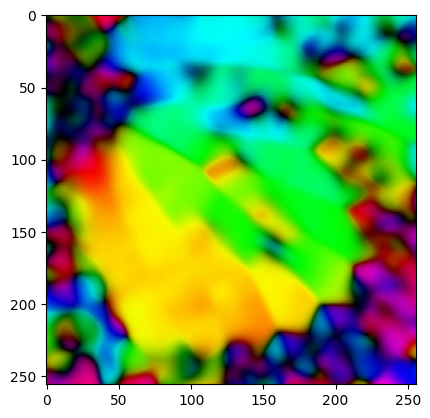

In [13]:
plt.imshow(plt.cm.gray(anisotropy)*orientation_st_rgba)
plt.show()

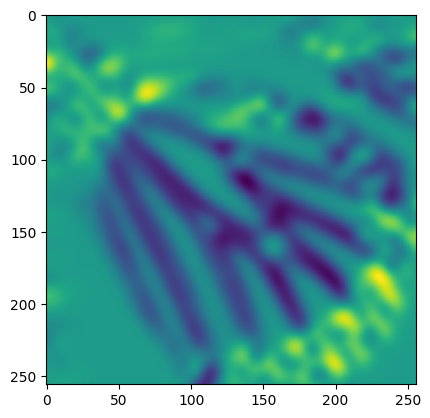

In [14]:
plt.imshow(S[2,...])
plt.show()